In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import results
reload(results)
Results = results.Results
r = Results('2016_06_22', 1)
r.print_config()

weights


weights initialisation,"['std_dev', 0.2]"
bias initial value,0.1


global


dropout_rate,0.8
optimizer,adam
network,convolution_gudi_2015
binary_softmax,True
cost_function,cross_entropy
batch_size,100
threshold,0.5
iterations,700
commit,da0fd8a
dump_frames,False
path,data


data


image_region,full
remove_empty_labels,False
validation_subjects,"[1, 3, 5, 7, 9, 11, 13, 17, 21, 24, 26, 28, 30, 32]"
batch_randomisation,True
dataset,disfa
image_shape,"[47, 47]"
train_subjects,"[2, 4, 6, 8, 10, 12, 16, 18, 23, 25, 27, 29, 31]"
test_subjects,"[1, 3, 5, 7, 9, 11, 13, 17, 21, 24, 26, 28, 30, 32]"
path,/vol/lm1015-tmp/data/2016_06_22
threshold,1
normalisation_type,face


crop


crop,"[0, 0, 0, 0]"
resize_scale,0.4


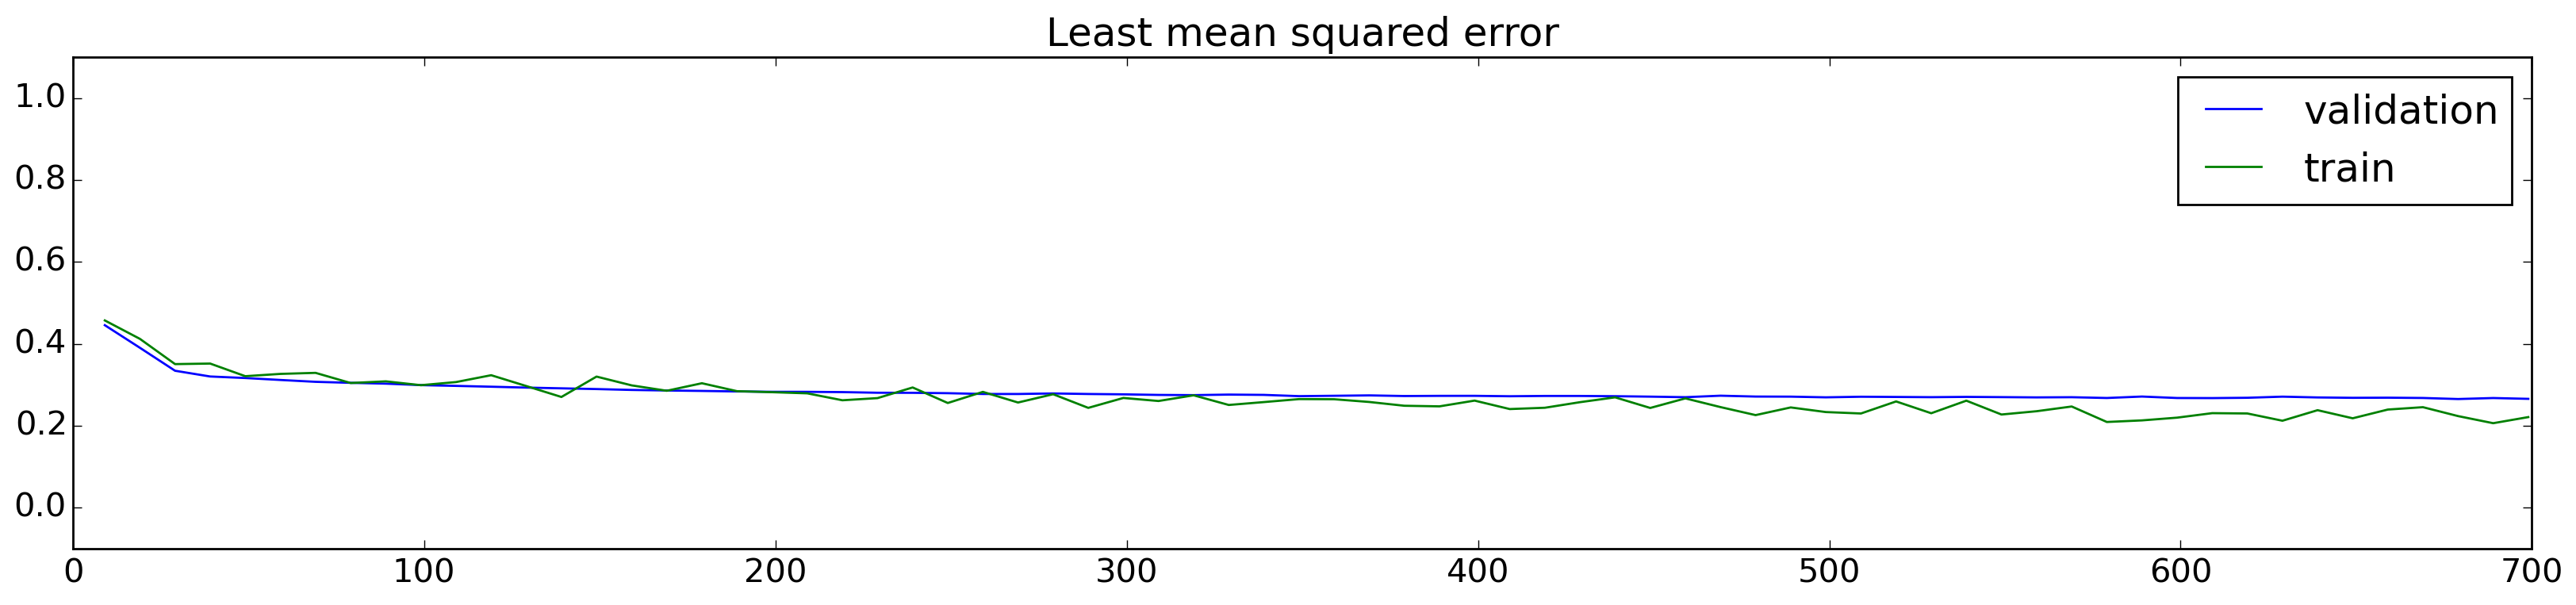

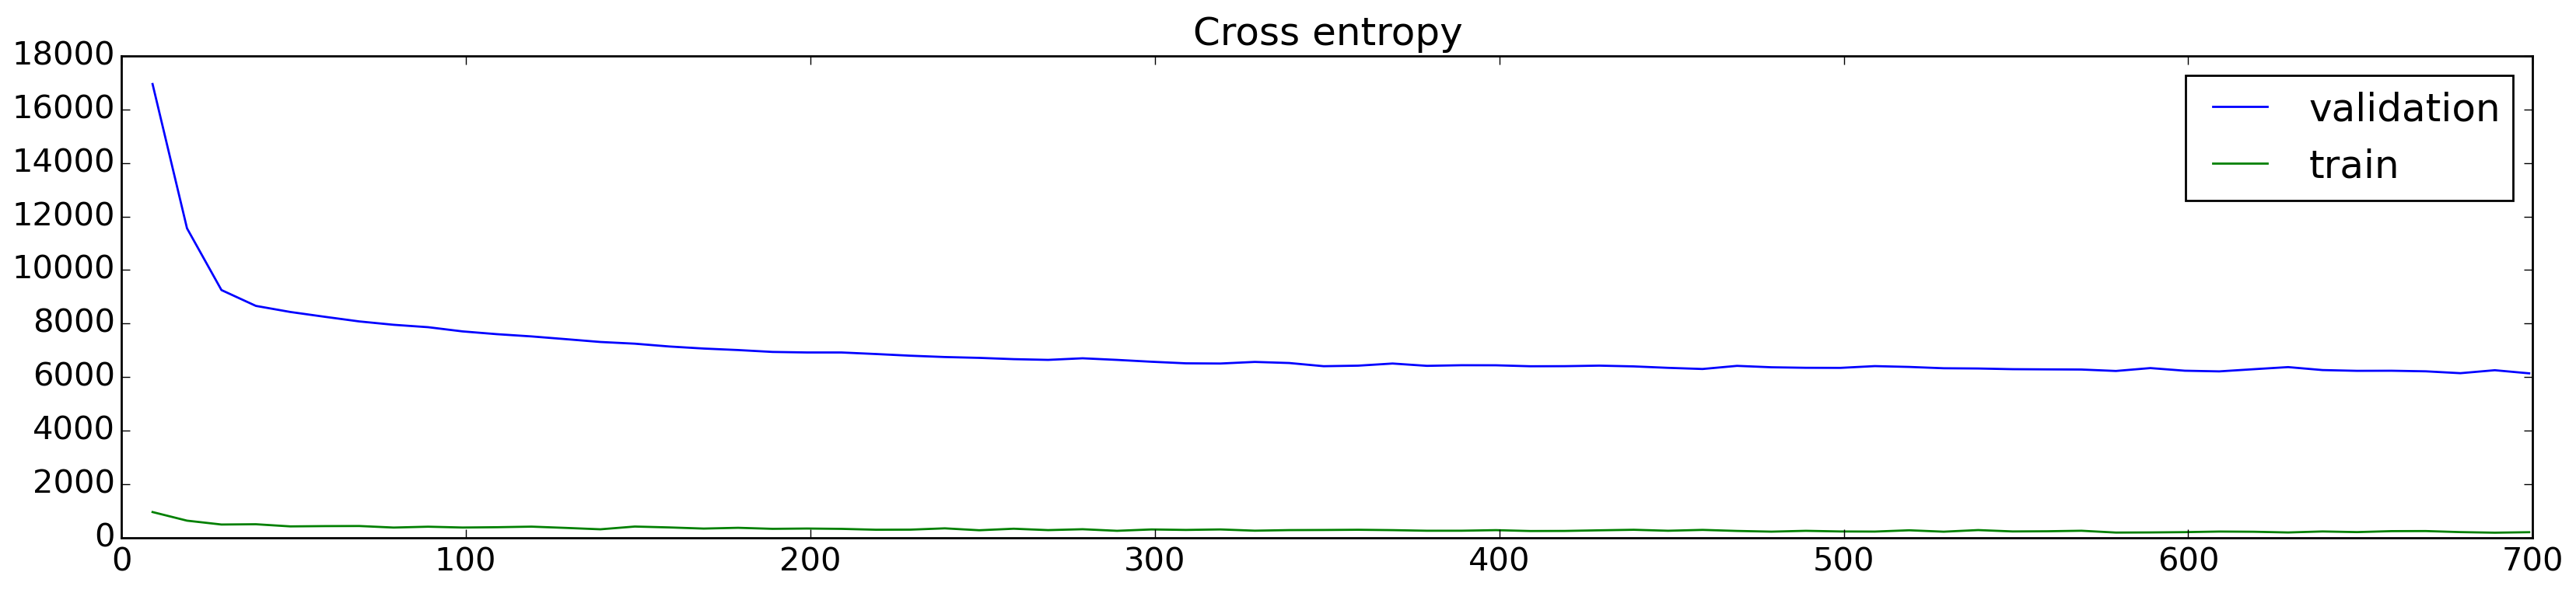

In [2]:
r.lmsq()
r.cross()

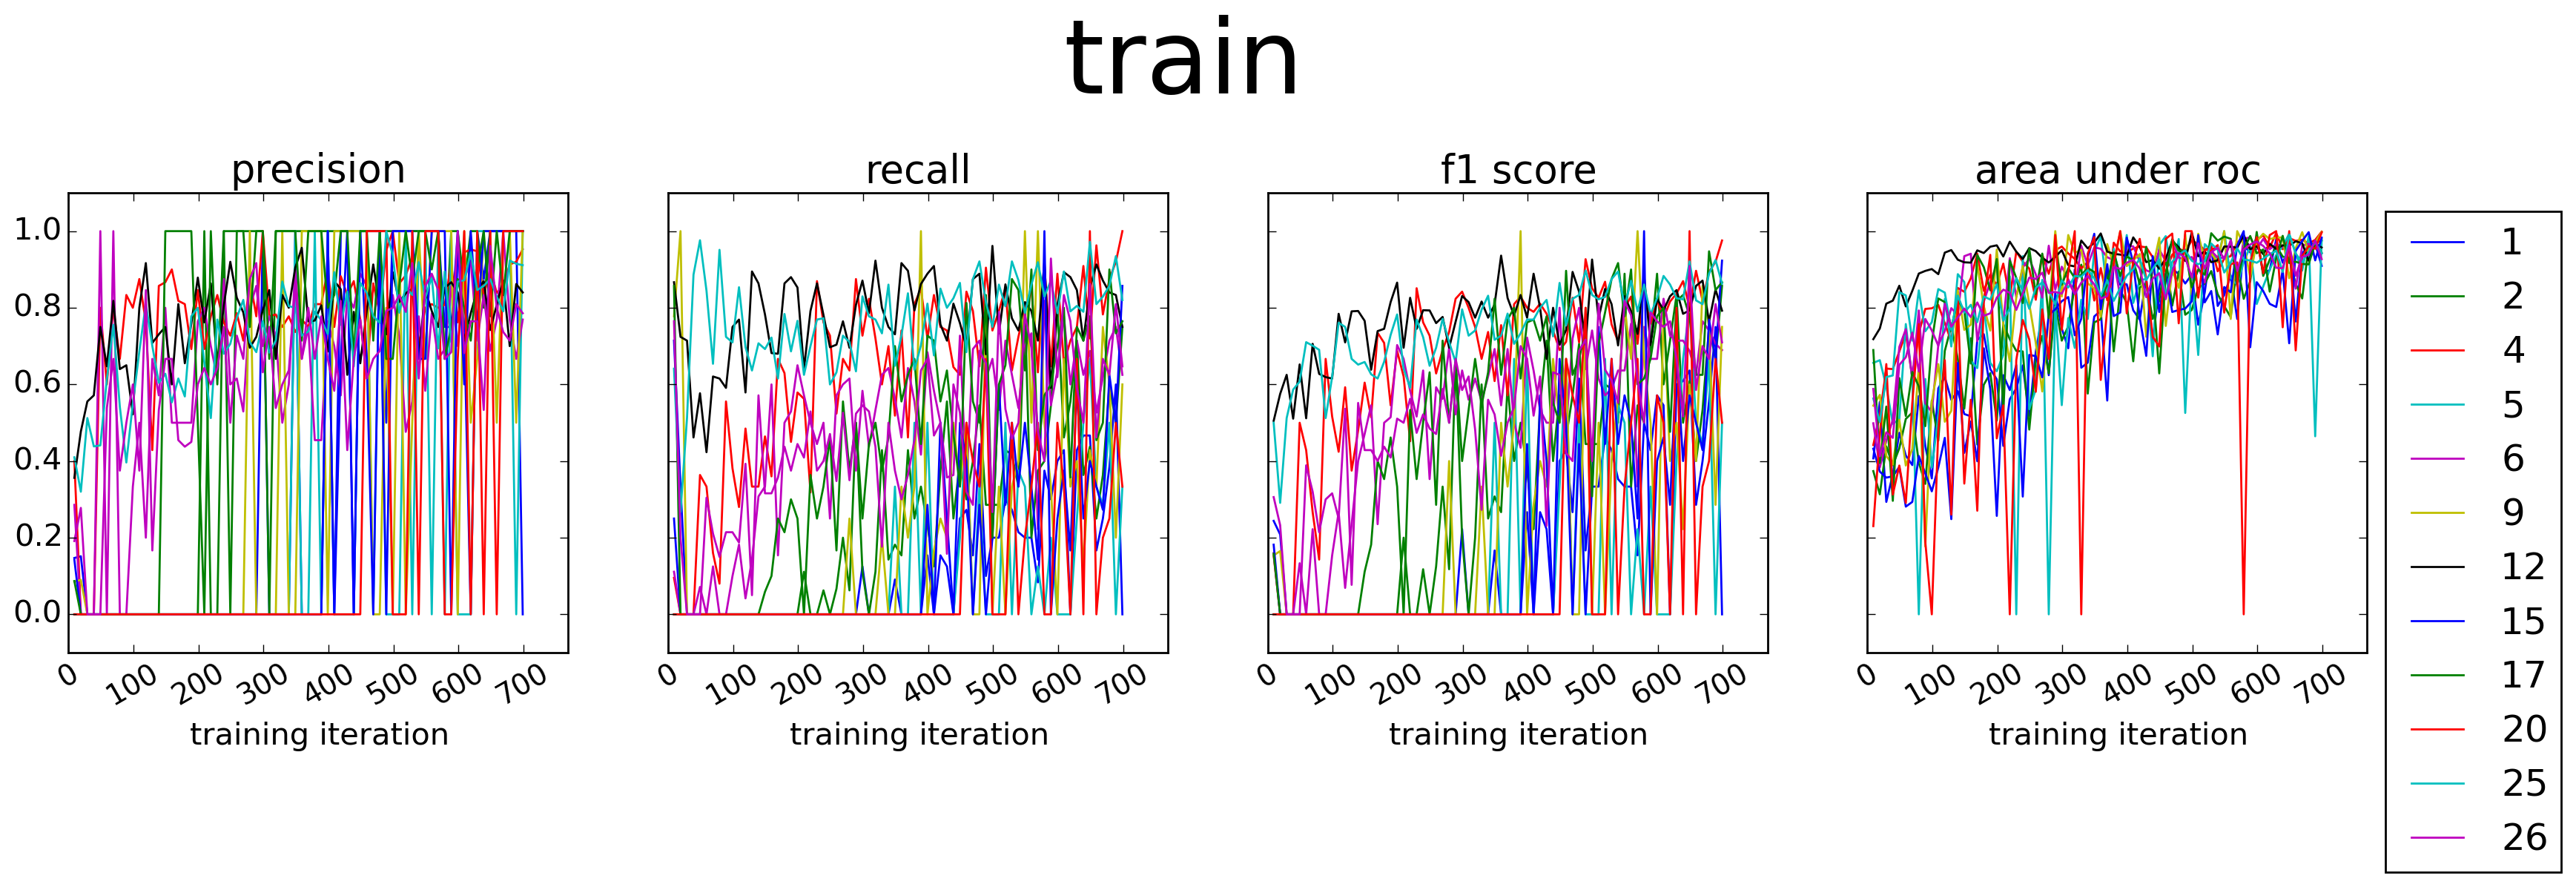

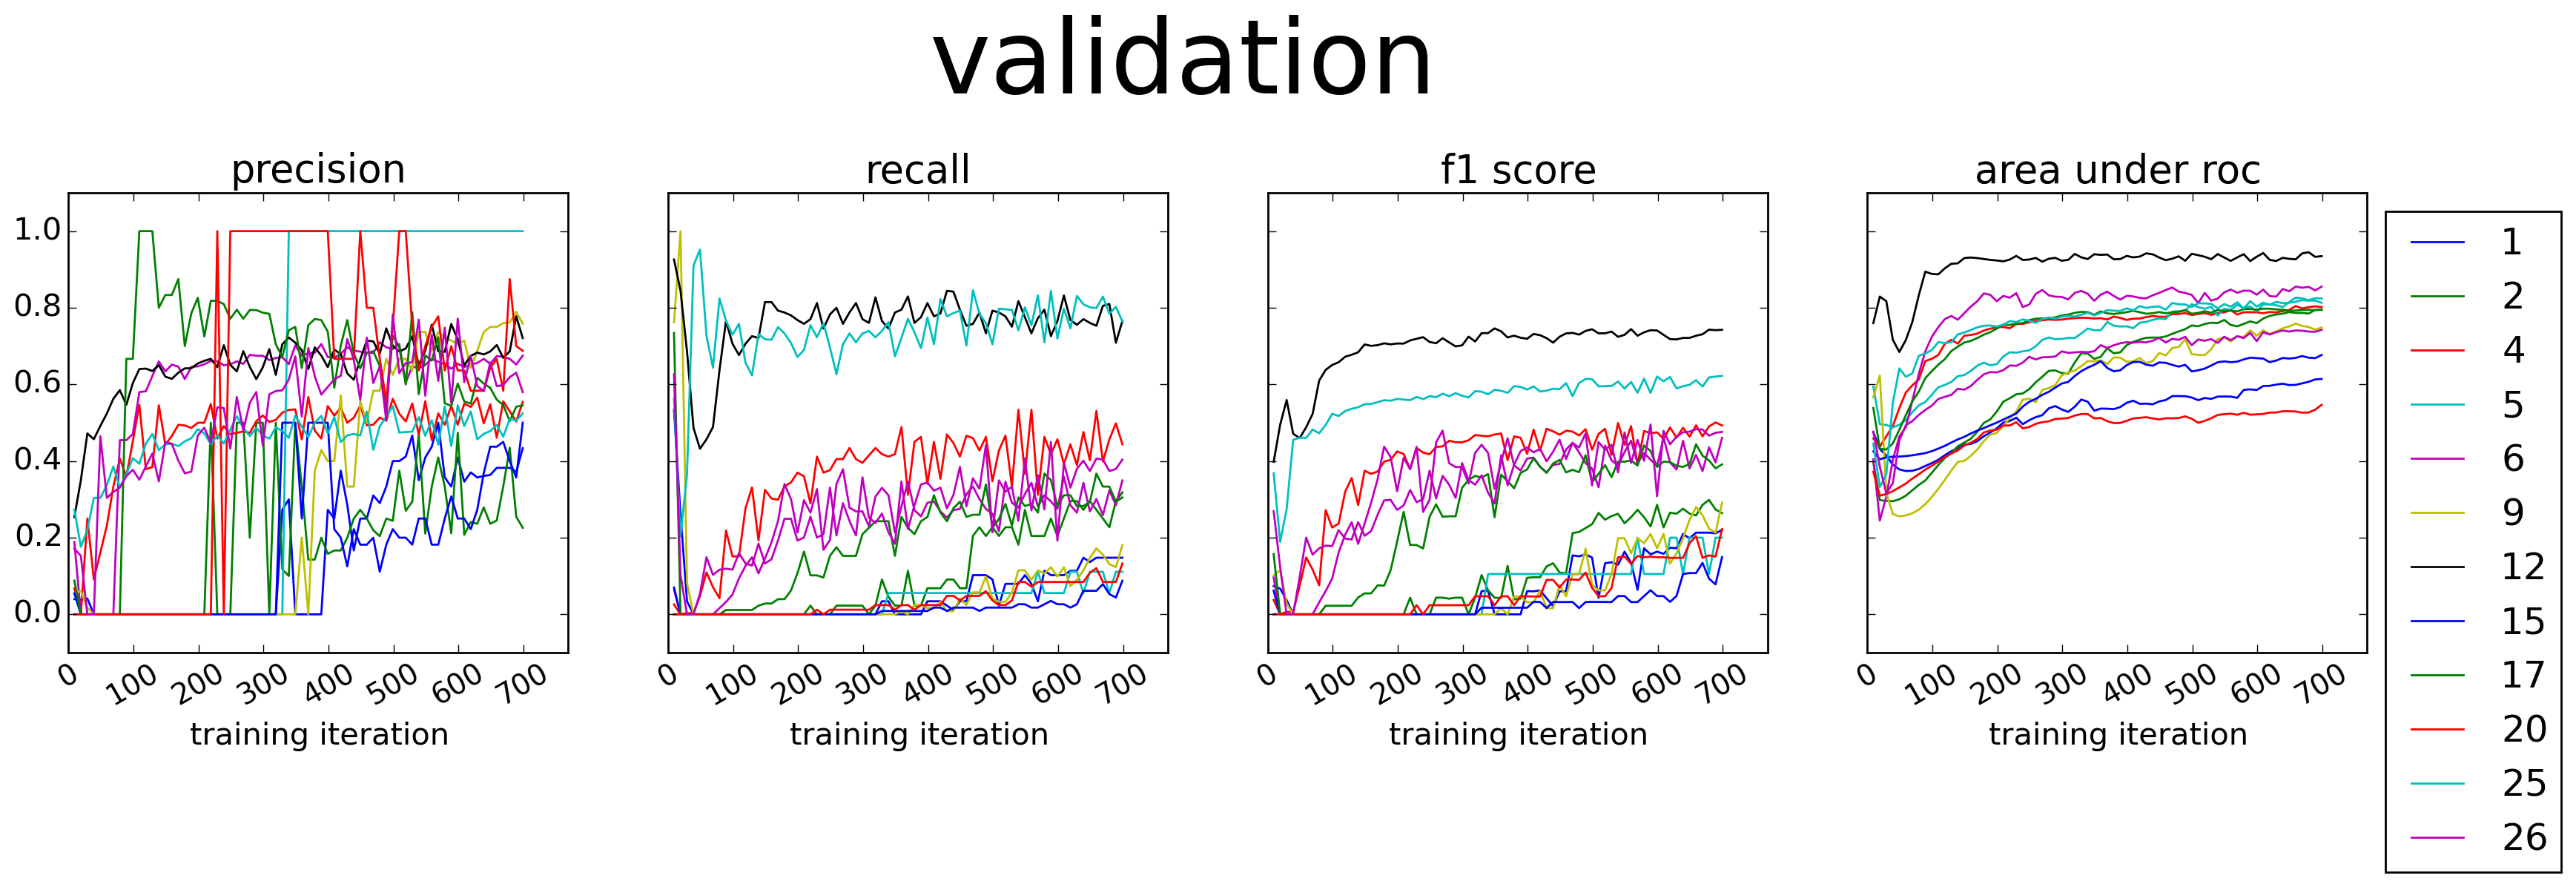

In [3]:
r.au('train',smooth=False)
r.au('validation',smooth=False)

# Test set:

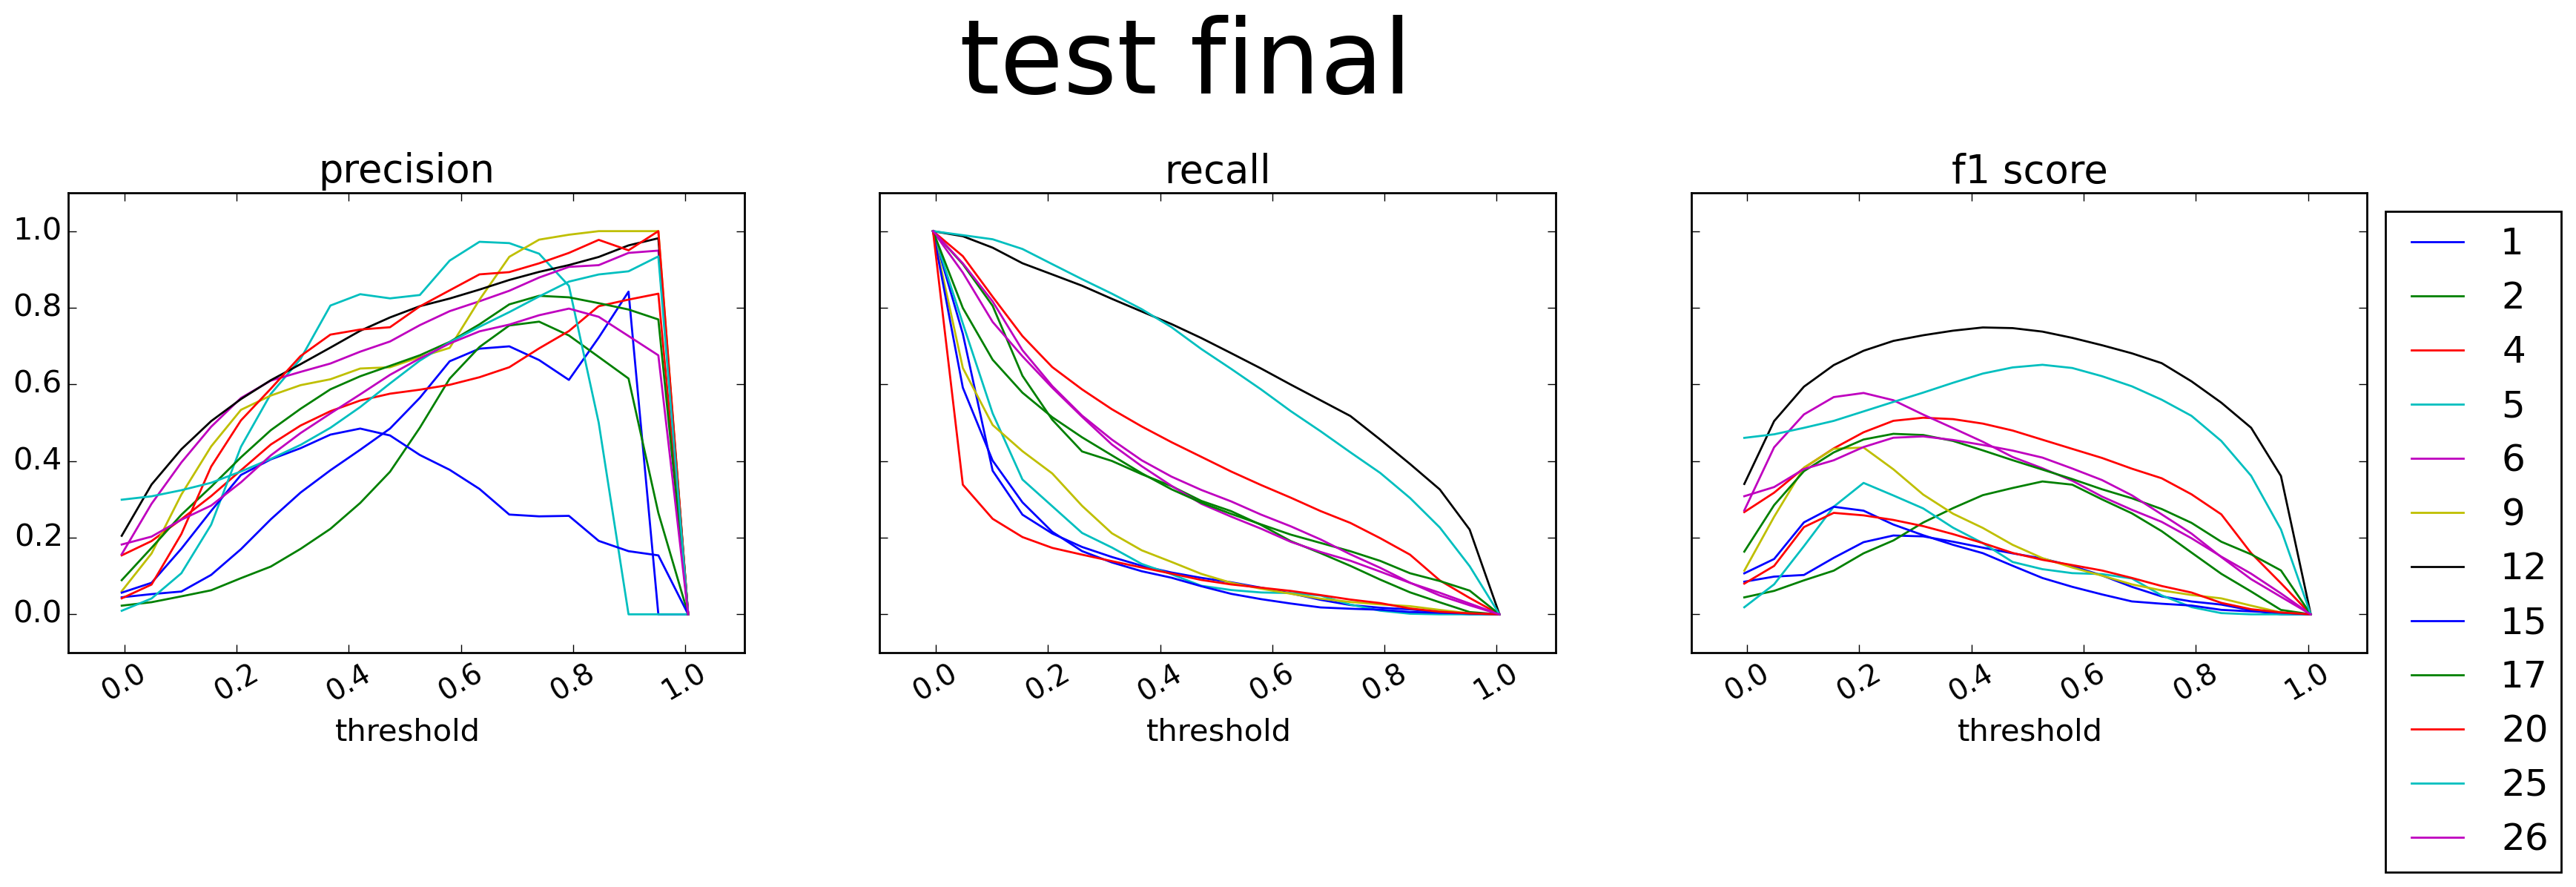

Test ROC values for each class:
(values for p,r,f1 are maximums)
class	roc	roc	f1	p	r
0 	0.6 	fail 	0.21 	0.84 	1.0
1 	0.79 	fair 	0.35 	0.76 	1.0
2 	0.79 	fair 	0.51 	0.84 	1.0
3 	0.87 	good 	0.34 	0.97 	1.0
4 	0.86 	good 	0.58 	0.95 	1.0
5 	0.75 	fair 	0.44 	1.0 	1.0
6 	0.94 	great 	0.75 	0.98 	1.0
7 	0.67 	poor 	0.28 	0.48 	1.0
8 	0.81 	good 	0.47 	0.83 	1.0
9 	0.56 	fail 	0.26 	1.0 	1.0
10 	0.81 	good 	0.65 	0.93 	1.0
11 	0.73 	fair 	0.46 	0.8 	1.0
average roc =  0.764588757796


In [4]:
r.au('test',smooth=False,model='final')
# r.au('test',smooth=False,model='early')

what


TypeError: 'list' object is not callable

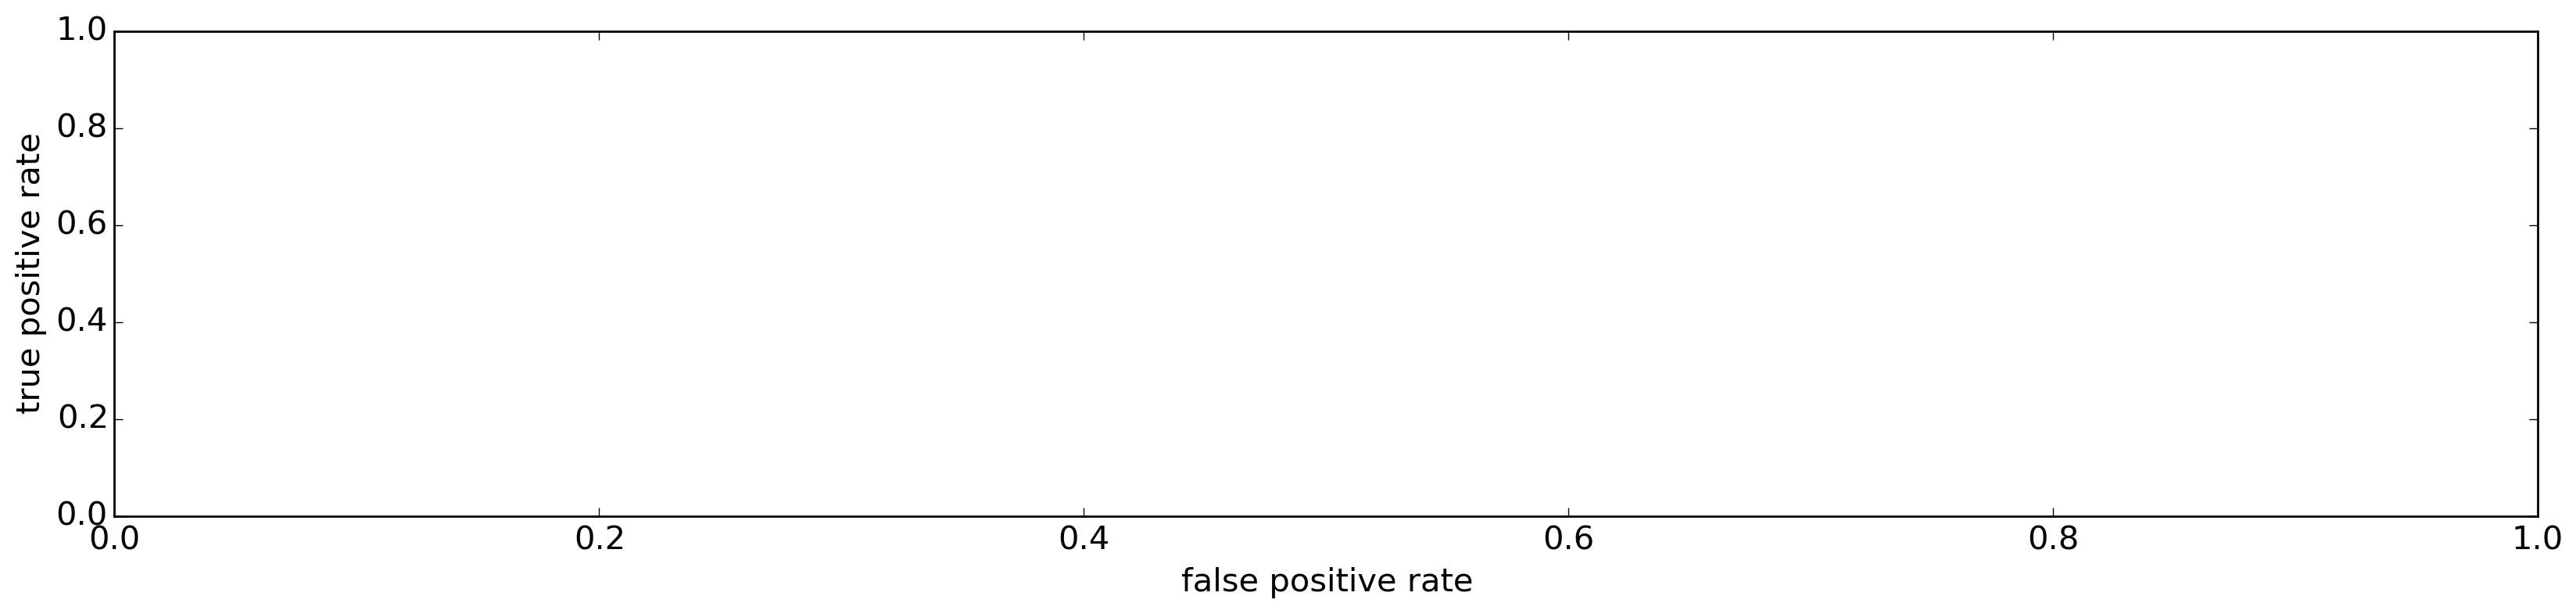

In [5]:
r.roc_plot()

In [ ]:
index = 9
r.test_confusion('final',index)